In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [96]:
def func(x, a, b) :
    return a*x+b
    
def khi2(y, ymod, s) :
    return (y - ymod)**2/s**2

def sumkhi2noiseY(paramMod) :
    res = 0
    i=0
    for x in xs :
        res += khi2(func(x,a,b)+err[i], paramMod[0]*x+paramMod[1], s)
        i += 1
    return res

n = 999
a = 9
b = 49
s = 10
xs = np.random.uniform(size=n)
err = np.random.normal(0, scale=s, size=n)

res = opt.minimize(sumkhi2noiseY, [1, 1])
print(res.hess_inv, "\n")


[[ 2.32425185e-04 -5.27199203e-05]
 [-5.27199203e-05  1.22147976e-05]] 



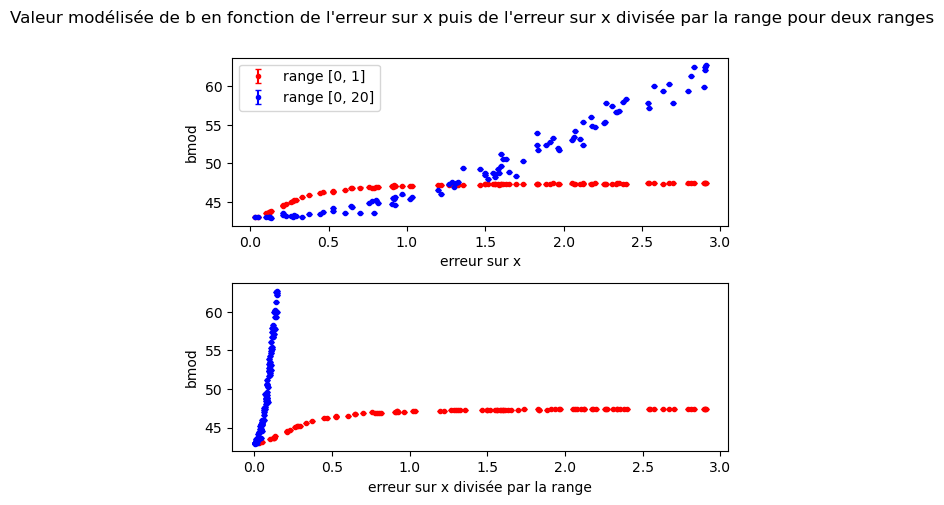

In [65]:
def func(x, a, b) :
    return a*x+b

def khi2(ydata, ymod, s) :
    return (ydata - ymod)**2/s**2

def sumkhi2noiseX(paramMod, err) :
    res = 0
    i=0
    for x in xs :
        res += khi2(func(x,a,b), paramMod[0]*(x+err[i])+paramMod[1], s)
        i += 1
    return res

def sumkhi2noiseY(paramMod, err) :
    res = 0
    i=0
    for x in xs :
        res += khi2(func(x,a,b)+err[i], paramMod[0]*x+paramMod[1], s)
        i += 1
    return res

nDataValues = 999
nscales = 100
a = 9
b = 43
scales = np.random.uniform(size=nscales, high=3)
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle("Valeur modélisée de b en fonction de l'erreur sur x puis de l'erreur sur x divisée par la range pour deux ranges")
ax1.set(xlabel="erreur sur x", ylabel="bmod")
ax2.set(xlabel="erreur sur x divisée par la range", ylabel="bmod")

colors = ("red", "blue")
index = 0
for r in (1, 20) :
    xs = np.random.uniform(size=nDataValues, high=r)
    valsBmod1 = []
    valsBmod2 = []
    for s in scales :
        err = np.random.normal(loc=0, size=nDataValues, scale=s)
        res1 = opt.minimize(sumkhi2noiseX, [1, 1], args=(err))
        res2 = opt.minimize(sumkhi2noiseX, [1, 1], args=(err))
        _, bmod1 = res1.x
        _, bmod2 = res2.x
        hess_inv1 = res1.hess_inv
        hess_inv2 = res2.hess_inv
        bsd1 = np.sqrt(hess_inv1[1,1])
        bsd2 = np.sqrt(hess_inv2[1,1])
        valsBmod1 = np.append(valsBmod1, bmod1)
        valsBmod2 = np.append(valsBmod2, bmod2)
        
    ax1.errorbar(scales, valsBmod1, yerr=bsd1, fmt=".", capsize=2.5, color=colors[index])
    
    ax2.errorbar(scales/r, valsBmod2, yerr=bsd2, fmt=".", capsize=2.5, color=colors[index])
    
    index += 1

ax1.legend(["range [0, 1]", "range [0, 20]"])

pos = ax2.get_position()
ax2.set_position([pos.x0, pos.y0-0.05, pos.width, pos.height])

mod1 values :  [1.80797151 2.03023645] 

mod1 khi2 :  19792.20339818354 

mod2 values :  [7.17611137 2.44479353] 

mod2 khi2 :  19791.323026504328 

real khi2 :  19791.262098689636 

real khi2 :  19972.52480671867 

real khi2 :  2152538.462333484 

real khi2 :  19792.93839350084 



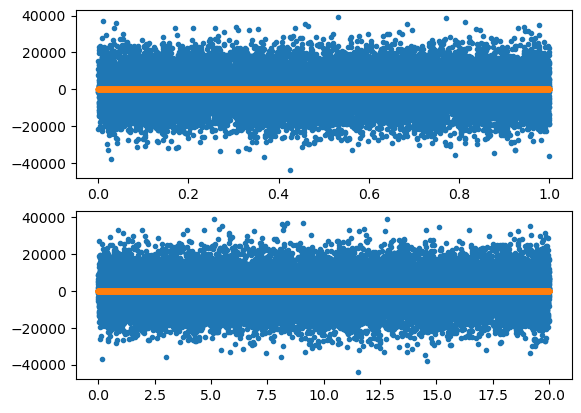

In [66]:
def func(x, a, b) :
    return a*x+b

def khi2(ydata, ymod, s) :
    return (ydata - ymod)**2/s**2

def sumkhi2noiseX(paramMod, err) :
    res = 0
    i=0
    for x in xs :
        res += khi2(func(x,a,b), paramMod[0]*(x+err[i])+paramMod[1], s)
        i += 1
    return res

def sumkhi2noiseY(paramMod, err) :
    res = 0
    i=0
    for x in xs :
        res += khi2(func(x,a,b)+err[i], paramMod[0]*x+paramMod[1], s)
        i += 1
    return res

n = 999*20
a = 9
b = 43
s = 10000

fig, (ax1, ax2) = plt.subplots(2)


err = np.random.normal(0, scale=s, size=n)

xs = np.random.uniform(size=n)
ys = a*xs + b + err
res1 = opt.minimize(sumkhi2noiseY, [1, 1], err).x
ax1.scatter(xs, ys, marker=".")
ax1.scatter(xs, res1[0]*xs+res1[1], marker=".")

xs = np.random.uniform(size=n, high=20)
ys = a*xs + b + err
res2 = opt.minimize(sumkhi2noiseY, [1, 1], err).x
ax2.scatter(xs, ys, marker=".")
ax2.scatter(xs, res2[0]*xs+res2[1], marker=".")


print("mod1 values : ", res1, "\n")
print("mod1 khi2 : ", sumkhi2noiseY([res1[0], res1[1]], err), "\n")
print("mod2 values : ", res2, "\n")
print("mod2 khi2 : ", sumkhi2noiseY([res2[0], res2[1]], err), "\n")
print("real khi2 : ", sumkhi2noiseY([9, 43], err), "\n")
print("real khi2 : ", sumkhi2noiseY([90, 4], err), "\n")
print("real khi2 : ", sumkhi2noiseY([9000, -429], err), "\n")
print("real khi2 : ", sumkhi2noiseY([0, 0], err), "\n")